# 4650 Assignment 1
## Team 27
## Yinzheng Tong(yt2742), Yufei Jin(yj2691)

## Q1

### (a)

In [1]:
nsp = read.csv("NewspaperSales.csv")
attach(nsp)
my_lm_1 = lm(Sales~Weekday+Rain+Temperature)
summary(my_lm_1)


Call:
lm(formula = Sales ~ Weekday + Rain + Temperature)

Residuals:
    Min      1Q  Median      3Q     Max 
-465.62 -148.27   49.21  161.12  290.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 534.6382    33.9824  15.733  < 2e-16 ***
Weekday      39.7362    13.9743   2.844  0.00455 ** 
Rain        -27.8047    16.0938  -1.728  0.08436 .  
Temperature   0.1196     0.4225   0.283  0.77712    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 197.5 on 996 degrees of freedom
Multiple R-squared:  0.01082,	Adjusted R-squared:  0.007843 
F-statistic: 3.632 on 3 and 996 DF,  p-value: 0.0126


In [2]:
predict(my_lm_1,data.frame(Weekday = c(0,0),Rain = c(0,1),Temperature = c(50,50)),
        interval = "prediction",level = .98)
predict(my_lm_1,data.frame(Weekday = c(0,0),Rain = c(0,0),Temperature = c(50,90)),
        interval = "prediction",level = .98)
predict(my_lm_1,data.frame(Weekday = c(0,1),Rain = c(0,0),Temperature = c(50,50)),
        interval = "prediction",level = .98)

,fit,lwr,upr
1,540.6193,78.92387,1002.3148
2,512.8146,50.05954,975.5697


,fit,lwr,upr
1,540.6193,78.92387,1002.315
2,545.4042,84.13507,1006.673


,fit,lwr,upr
1,540.6193,78.92387,1002.315
2,580.3555,119.16919,1041.542


### Answer: 
#### According to the regression result, only Weekday and Rain have significant influence on Sales since their p values are small and the p values for Temperature and Rain are relatively high which indicate that Sales do not have linear relationship with temperature and rain. According to the prediction changes, it, to certain degree, makes some sense to me because the result shows that with rain and weekend, comes with lower sales. Since the Temperature variable is not statistically significant, we don't need to consider its prediction. However,  Multiple R-squared, Adjusted R-squared are small and p value for F-statistic is relatively large which means it is not a good model and makes little sense in Sales prediction.


### (b)

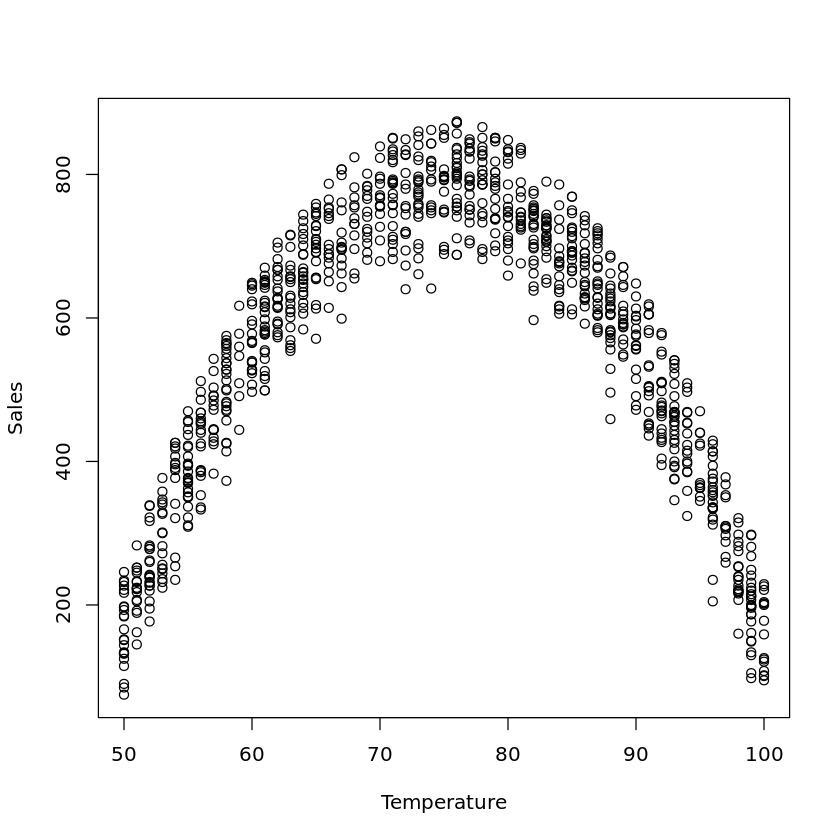

In [3]:
Temp2 = Temperature**2
nsp['Temp2'] = Temp2
plot(Temperature, Sales)

### Answer:
#### According to the graph we can see that the Sales goes up in the beginning when the Temperature goes up. And the Sales goes down after the peak around 70 to 80. I'd like to add the square of temperature as a new variable.

### (c)

In [4]:
my_lm_2 = lm(Sales~.,data = nsp)
summary(my_lm_2)


Call:
lm(formula = Sales ~ ., data = nsp)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.504 -31.285  -1.178  33.503  74.832 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.884e+03  3.421e+01 -142.78   <2e-16 ***
Weekday      5.057e+01  2.683e+00   18.85   <2e-16 ***
Rain        -5.849e+01  3.095e+00  -18.90   <2e-16 ***
Temperature  1.507e+02  9.364e-01  160.89   <2e-16 ***
Temp2       -1.005e+00  6.229e-03 -161.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.91 on 995 degrees of freedom
Multiple R-squared:  0.9636,	Adjusted R-squared:  0.9634 
F-statistic:  6584 on 4 and 995 DF,  p-value: < 2.2e-16


### Answer:
#### Sales = -4884 + 50.57*Weekday - 58.49*Rain + 150.7*Temperature - 1.005*Temperature2
#### The new model consists of four predictors. It make sense to me because in this model, the square of Temperature has a significant correlation with Sales, which fits with the plot in previous question and p value for each independent variable is small which suggests plausible linear relationships. 
#### The results are much better since multiple R-squared and Adjusted R-squared are much larger and p value of F-statistic is much smaller compared with the initial model.

### (d)

In [6]:
my_lm_3 = lm(Sales~.+I(Weekday*Rain*Temperature),data = nsp)
summary(my_lm_3)


Call:
lm(formula = Sales ~ . + I(Weekday * Rain * Temperature), data = nsp)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.373 -31.723  -0.584  33.159  74.122 

Coefficients:
                                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                     -4.887e+03  3.425e+01 -142.682   <2e-16 ***
Weekday                          5.220e+01  2.922e+00   17.862   <2e-16 ***
Rain                            -5.164e+01  5.777e+00   -8.938   <2e-16 ***
Temperature                      1.507e+02  9.362e-01  160.956   <2e-16 ***
Temp2                           -1.005e+00  6.226e-03 -161.451   <2e-16 ***
I(Weekday * Rain * Temperature) -1.222e-01  8.696e-02   -1.405     0.16    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.89 on 994 degrees of freedom
Multiple R-squared:  0.9637,	Adjusted R-squared:  0.9635 
F-statistic:  5273 on 5 and 994 DF,  p-value: < 2.2e-16


### Answer:
#### Sales = -4887 + 52.2*Weekday - 51.64*Rain + 150.7*Temperature - 1.005*Temperature2 - 0.1222*interaction
#### The new model consists of five predictors. It makes sense to me as features with small p value are very likely linearly correlated with Sales. 
#### Although the result doesn't change a lot compared with the second model and the new interaction term is not significant, the introduction of interaction term improves the statistical index such as R-squared, adjusted R-squared. So the results are better compared with other two models.

### (e)

### Answer
#### I would like to choose the third one. Because the first model doesn't depict the quadratic relationship between Temperature and Sales. And the second model has poorer performance in statistical test.

### (f)

In [7]:
confint(my_lm_3, level = .9)

,5 %,95 %
(Intercept),-4943.1252399,-4.830350e+03
Weekday,47.3851680,5.700724e+01
Rain,-61.1486101,-4.212546e+01
Temperature,149.1421362,1.522248e+02
Temp2,-1.0154671,-9.949658e-01
I(Weekday * Rain * Temperature),-0.2653571,2.099112e-02


### Answer:
#### We are 90% confident that the population mean (which is the population mean of the coefficient vector in this case) falls into the interval we calculated. In other words, a 90% confidence interval for our estimate (which is the population mean of the coefficient vector in this case) means that if the CI procedure is repeated many times, the true value is within that interval 90% of the time.
#### The positive coefficient of Weekday means that the Sales would raise by 47.39 to 57.01 during weekdays. The coefficient of Rain means that the Sales would very much likely to drop by 42.13 to 61.15. 


### (g)

In [11]:
predict(my_lm_3,data.frame(Weekday = 0,Rain = 1,Temperature = 81,Temp2=81*81),
        interval = "prediction",level = .98)

,fit,lwr,upr
1,671.7596,582.5689,760.9503


### Answer:
#### The result means that on a rainy weekend 81 degree F day, we are 98% confident that the sales will be between 582.5689 and 760.9503.
#### ### In other words, the 98% prediction interval for sales means if the PI procedure is repeated many times, the sales for a rainy weekend 81 degree F day is within that interval 98% of the time.


## Q2

### (a)

In [23]:
eCar = read.csv("NomisB_e-Car_Data.csv")
ecar = eCar[eCar$Car..Type == 'N' & eCar$Term == 60 & eCar$FICO>=655 
            & eCar$FICO<=725 & eCar$Amount>=25000 & eCar$Amount<=50000,]

### Answer:
#### The linear regression model is as follows:
#### Outcome = a + b*APR + u
#### where Outcome is a dummy variable.

### (b)

In [24]:
my_lm_4 = lm(Outcome~Rate,data = ecar)
summary(my_lm_4)


Call:
lm(formula = Outcome ~ Rate, data = ecar)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04686 -0.03726 -0.03296 -0.02651  1.00545 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0722954  0.0056971  12.690  < 2e-16 ***
Rate        -0.0071656  0.0009621  -7.448 9.87e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1728 on 18725 degrees of freedom
Multiple R-squared:  0.002954,	Adjusted R-squared:  0.002901 
F-statistic: 55.48 on 1 and 18725 DF,  p-value: 9.869e-14


### Answer:
#### It is not a good fit since Multiple R-squared and Adjusted R-squared are low.

### (c)

In [25]:
my_lm_5 = lm(Outcome~Rate+Competition.rate,data = ecar)
summary(my_lm_5)


Call:
lm(formula = Outcome ~ Rate + Competition.rate, data = ecar)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05491 -0.03909 -0.03261 -0.02273  1.00809 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0057625  0.0137921   0.418    0.676    
Rate             -0.0075970  0.0009648  -7.874 3.62e-15 ***
Competition.rate  0.0152732  0.0028838   5.296 1.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1727 on 18724 degrees of freedom
Multiple R-squared:  0.004445,	Adjusted R-squared:  0.004339 
F-statistic:  41.8 on 2 and 18724 DF,  p-value: < 2.2e-16


### Answer:
#### Yes. The new model makes sense. By adding the competition rate into the model we can see the the probability of acceptance rises when the competitor's rate goes up. We could not reject the Intercept is 0 and but p values for Rate and Competition.rate are small which indicates it is very plausible that Outcome has linear relationship with Rate and Competition.rate.
#### The fit improves a little bit but the overall performance is poor.

### (d)

In [26]:
p2.residual = my_lm_5$residuals[ecar$Partner.Bin == 2]
RSE = (sum(p2.residual^2)/(length(p2.residual)-2-1))^0.5
print(RSE)

[1] 0.1118133


### Answer:
#### The RSE of the predictions for customers in Partner Bin 2 is 0.1118133

### (e)

In [27]:
Tecar = eCar[eCar$Car..Type == 'N' & eCar$FICO>=655 & eCar$FICO<=725 
             & eCar$Amount>=25000 & eCar$Amount<=50000,]


In [28]:
my_lm_6 = lm(Outcome~Rate+Competition.rate+Term, data = Tecar)
summary(my_lm_6)


Call:
lm(formula = Outcome ~ Rate + Competition.rate + Term, data = Tecar)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11508 -0.06284 -0.04587 -0.02641  1.05511 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.1298429  0.0105007 -12.365   <2e-16 ***
Rate             -0.0105915  0.0009035 -11.723   <2e-16 ***
Competition.rate  0.0214525  0.0024229   8.854   <2e-16 ***
Term              0.0022588  0.0001550  14.569   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2087 on 33120 degrees of freedom
Multiple R-squared:  0.01843,	Adjusted R-squared:  0.01834 
F-statistic: 207.3 on 3 and 33120 DF,  p-value: < 2.2e-16


### Answer:
#### The new model performs much better than previous models which suggest that Term is an important factor for predicting Outcome.

## Q3

### (a)

### Answer:
#### Because the absolute values are much more difficult to handle in our calculation. The RSS makes it much easier to operate mathematically

#### We use RSS instead of the sum of the absolute values of the residuals basically due to following 3 reasons:  
#### 1 RSS allows us to punish big errors more severely.
#### 2 RSS is an smooth objective function which means it is a strictly convex function. So the minimum we find is the global minimum.
#### 3 RSS is an unbiased estimator

### (b)

### Answer:
#### Because sometimes we need more specific number in the regression. What's more, if we only rely on plotting, it's impossible to judge whether two variables are signidicantly correlated or not. We need regression process to calculate the t value and p value of each parameters.

### (c)

### Answer:
#### We mistakenly use the real value, instead of the predictive value, of the dependent variable as the subtracted term during the calculation of MSE.
#### Ruling out some ridiculous mistakes such as wrong model, it is mostly likely to be caused by overfitting which means we have too many features that our model fits every data point perfectly. However, this kind of model makes no sense in prediction and we could not get insights from it.